In [59]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e10bff16-79c4-4f8f-951f-89ad5c25e6c1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-12-26T10:24:16.878Z', 'error_code': 0, 'error_message': None, 'elapsed': 24, 'credit_count': 1, 'notice': None, 'total_count': 10453}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11853, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [60]:
type(data)

dict

In [61]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [62]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-12-26T10:24:16.878Z,0,None,24,1,None,10453


In [63]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11853,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19801340.00000,19801340.00000,False,NaN,1,None,None,None,2024-12-26T10:22:00.000Z,95328.62935,42347985828.15231,-1.87740,-0.27436,-3.88088,-6.67310,2.38486,42.17210,45.39755,1887634601429.43872,56.93490,2001901216282.23999,None,2024-12-26T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
1,1027,Ethereum,ETH,ethereum,9731,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120462694.70598,120462694.70598,True,NaN,2,None,None,None,2024-12-26T10:23:00.000Z,3363.44343,19780620300.55932,-8.82030,-0.16683,-5.05137,-8.94164,0.59652,36.38821,27.16833,405169459175.05170,12.21280,405169459175.04999,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
2,825,Tether USDt,USDT,tether,110118,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,139427879732.05347,143440125282.93454,True,NaN,3,None,None,None,2024-12-26T10:23:00.000Z,0.99891,104551911440.73442,-2.39280,-0.04920,-0.01770,-0.04626,-0.12374,-0.05052,-0.13128,139275357371.05676,4.20140,143283213863.12000,None,2024-12-26T10:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-26 11:24:15.032461
3,52,XRP,XRP,xrp,1488,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57252380420.00000,99986807248.00000,False,NaN,4,None,None,None,2024-12-26T10:23:00.000Z,2.17335,4739889541.64705,-8.26290,-0.50154,-6.55132,-9.81883,60.76045,324.40801,270.63463,124429493669.32133,3.75300,217335057086.73001,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
4,1839,BNB,BNB,bnb,2318,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144007402.62000,144007402.62000,False,NaN,5,None,None,None,2024-12-26T10:23:00.000Z,694.46673,1113766610.36654,6.30240,-0.01208,-2.39304,-0.60712,11.02545,19.27028,15.11067,100008350507.34528,3.01540,100008350507.35001,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
5,5426,Solana,SOL,solana,816,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479544342.51361,590932407.76202,True,NaN,6,None,None,None,2024-12-26T10:23:00.000Z,188.91582,2749345195.60575,-21.16760,-0.07140,-5.53594,-10.15544,-18.38336,8.57146,20.48469,90593510869.53520,2.73290,111636478130.75999,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
6,74,Dogecoin,DOGE,dogecoin,1133,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147359266383.70520,147359266383.70520,True,NaN,7,None,None,None,2024-12-26T10:23:00.000Z,0.31530,2729973769.89032,-14.14230,-0.51945,-7.29993,-13.13111,-17.92695,129.61172,155.77876,46461940784.43464,1.40160,46461940784.43000,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
7,3408,USDC,USDC,usd-coin,24154,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43090128490.50891,43090128490.50891,False,NaN,8,None,None,None,2024-12-26T10:23:00.000Z,0.99994,5899183139.24830,-11.03980,-0.01093,0.00259,-0.00231,-0.00338,-0.06337,-0.00049,43087519749.06671,1.29880,43087519749.07000,None,2024-12-26T10:23:00.000Z,1027.00000,Ethereum,

In [64]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e10bff16-79c4-4f8f-951f-89ad5c25e6c1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

    #if not os.path.isfile(r"C:\Users\user\Documents\Python Tutorials\Python Scripts\API.csv"):
        #df.to_csv(r"C:\Users\user\Documents\Python Tutorials\Python Scripts\API.csv", header='column_names')
    #else:
        #df.to_csv(r"C:\Users\user\Documents\Python Tutorials\Python Scripts\API.csv", mode='a', header=False)

In [65]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [66]:
#df72 = pd.read_csv(r"C:\Users\user\Documents\Python Tutorials\Python Scripts\API.csv")
#df72

In [67]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11853,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19801340.00000,19801340.00000,False,NaN,1,None,None,None,2024-12-26T10:22:00.000Z,95328.62935,42347985828.15231,-1.87740,-0.27436,-3.88088,-6.67310,2.38486,42.17210,45.39755,1887634601429.43872,56.93490,2001901216282.23999,None,2024-12-26T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
1,1027,Ethereum,ETH,ethereum,9731,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120462694.70598,120462694.70598,True,NaN,2,None,None,None,2024-12-26T10:23:00.000Z,3363.44343,19780620300.55932,-8.82030,-0.16683,-5.05137,-8.94164,0.59652,36.38821,27.16833,405169459175.05170,12.21280,405169459175.04999,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
2,825,Tether USDt,USDT,tether,110118,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,139427879732.05347,143440125282.93454,True,NaN,3,None,None,None,2024-12-26T10:23:00.000Z,0.99891,104551911440.73442,-2.39280,-0.04920,-0.01770,-0.04626,-0.12374,-0.05052,-0.13128,139275357371.05676,4.20140,143283213863.12000,None,2024-12-26T10:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-26 11:24:15.032461
3,52,XRP,XRP,xrp,1488,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57252380420.00000,99986807248.00000,False,NaN,4,None,None,None,2024-12-26T10:23:00.000Z,2.17335,4739889541.64705,-8.26290,-0.50154,-6.55132,-9.81883,60.76045,324.40801,270.63463,124429493669.32133,3.75300,217335057086.73001,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
4,1839,BNB,BNB,bnb,2318,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144007402.62000,144007402.62000,False,NaN,5,None,None,None,2024-12-26T10:23:00.000Z,694.46673,1113766610.36654,6.30240,-0.01208,-2.39304,-0.60712,11.02545,19.27028,15.11067,100008350507.34528,3.01540,100008350507.35001,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
5,5426,Solana,SOL,solana,816,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479544342.51361,590932407.76202,True,NaN,6,None,None,None,2024-12-26T10:23:00.000Z,188.91582,2749345195.60575,-21.16760,-0.07140,-5.53594,-10.15544,-18.38336,8.57146,20.48469,90593510869.53520,2.73290,111636478130.75999,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
6,74,Dogecoin,DOGE,dogecoin,1133,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147359266383.70520,147359266383.70520,True,NaN,7,None,None,None,2024-12-26T10:23:00.000Z,0.31530,2729973769.89032,-14.14230,-0.51945,-7.29993,-13.13111,-17.92695,129.61172,155.77876,46461940784.43464,1.40160,46461940784.43000,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
7,3408,USDC,USDC,usd-coin,24154,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43090128490.50891,43090128490.50891,False,NaN,8,None,None,None,2024-12-26T10:23:00.000Z,0.99994,5899183139.24830,-11.03980,-0.01093,0.00259,-0.00231,-0.00338,-0.06337,-0.00049,43087519749.06671,1.29880,43087519749.07000,None,2024-12-26T10:23:00.000Z,1027.00000,Ethereum,

In [68]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [69]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11853,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19801340.00000,19801340.00000,False,NaN,1,None,None,None,2024-12-26T10:22:00.000Z,95328.62935,42347985828.15231,-1.87740,-0.27436,-3.88088,-6.67310,2.38486,42.17210,45.39755,1887634601429.43872,56.93490,2001901216282.23999,None,2024-12-26T10:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
1,1027,Ethereum,ETH,ethereum,9731,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120462694.70598,120462694.70598,True,NaN,2,None,None,None,2024-12-26T10:23:00.000Z,3363.44343,19780620300.55932,-8.82030,-0.16683,-5.05137,-8.94164,0.59652,36.38821,27.16833,405169459175.05170,12.21280,405169459175.04999,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
2,825,Tether USDt,USDT,tether,110118,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,139427879732.05347,143440125282.93454,True,NaN,3,None,None,None,2024-12-26T10:23:00.000Z,0.99891,104551911440.73442,-2.39280,-0.04920,-0.01770,-0.04626,-0.12374,-0.05052,-0.13128,139275357371.05676,4.20140,143283213863.12000,None,2024-12-26T10:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-26 11:24:15.032461
3,52,XRP,XRP,xrp,1488,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57252380420.00000,99986807248.00000,False,NaN,4,None,None,None,2024-12-26T10:23:00.000Z,2.17335,4739889541.64705,-8.26290,-0.50154,-6.55132,-9.81883,60.76045,324.40801,270.63463,124429493669.32133,3.75300,217335057086.73001,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
4,1839,BNB,BNB,bnb,2318,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144007402.62000,144007402.62000,False,NaN,5,None,None,None,2024-12-26T10:23:00.000Z,694.46673,1113766610.36654,6.30240,-0.01208,-2.39304,-0.60712,11.02545,19.27028,15.11067,100008350507.34528,3.01540,100008350507.35001,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
5,5426,Solana,SOL,solana,816,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479544342.51361,590932407.76202,True,NaN,6,None,None,None,2024-12-26T10:23:00.000Z,188.91582,2749345195.60575,-21.16760,-0.07140,-5.53594,-10.15544,-18.38336,8.57146,20.48469,90593510869.53520,2.73290,111636478130.75999,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
6,74,Dogecoin,DOGE,dogecoin,1133,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147359266383.70520,147359266383.70520,True,NaN,7,None,None,None,2024-12-26T10:23:00.000Z,0.31530,2729973769.89032,-14.14230,-0.51945,-7.29993,-13.13111,-17.92695,129.61172,155.77876,46461940784.43464,1.40160,46461940784.43000,None,2024-12-26T10:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-26 11:24:15.032461
7,3408,USDC,USDC,usd-coin,24154,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43090128490.50891,43090128490.50891,False,NaN,8,None,None,None,2024-12-26T10:23:00.000Z,0.99994,5899183139.24830,-11.03980,-0.01093,0.00259,-0.00231,-0.00338,-0.06337,-0.00049,43087519749.06671,1.29880,43087519749.07000,None,2024-12-26T10:23:00.000Z,1027.00000,Ethereum,

In [70]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.24814,-3.81839,-6.59088,2.54126,42.27107,45.49505
Ethereum,-0.00345,-4.77235,-8.73769,0.74918,36.56692,27.34113
Tether USDt,-0.02633,-0.03236,-0.05305,-0.13395,-0.01263,-0.13530
XRP,-0.42025,-6.46615,-9.66899,60.80668,324.82567,270.98344
BNB,-0.02233,-2.39867,-0.61696,10.94896,19.30611,15.09120
Solana,-0.06105,-5.50226,-10.06348,-18.38873,8.69282,20.53031
Dogecoin,-0.44460,-7.33351,-13.01389,-17.88115,129.92325,155.78400
USDC,-0.00599,-0.00965,-0.00405,-0.00560,-0.02497,-0.00350
Cardano,-0.19714,-7.08674,-11.37673,-6.27580,161.19864,116.06138


In [71]:
df4 = df3.stack()
df4


name                                     
Bitcoin      quote.USD.percent_change_1h     -0.24814
             quote.USD.percent_change_24h    -3.81839
             quote.USD.percent_change_7d     -6.59088
             quote.USD.percent_change_30d     2.54126
             quote.USD.percent_change_60d    42.27107
             quote.USD.percent_change_90d    45.49505
Ethereum     quote.USD.percent_change_1h     -0.00345
             quote.USD.percent_change_24h    -4.77235
             quote.USD.percent_change_7d     -8.73769
             quote.USD.percent_change_30d     0.74918
             quote.USD.percent_change_60d    36.56692
             quote.USD.percent_change_90d    27.34113
Tether USDt  quote.USD.percent_change_1h     -0.02633
             quote.USD.percent_change_24h    -0.03236
             quote.USD.percent_change_7d     -0.05305
             quote.USD.percent_change_30d    -0.13395
             quote.USD.percent_change_60d    -0.01263
             quote.USD.percent_change_90

In [72]:
type(df4)

pandas.core.series.Series

In [73]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.24814
            quote.USD.percent_change_24h  -3.81839
            quote.USD.percent_change_7d   -6.59088
            quote.USD.percent_change_30d   2.54126
            quote.USD.percent_change_60d  42.27107
            quote.USD.percent_change_90d  45.49505
Ethereum    quote.USD.percent_change_1h   -0.00345
            quote.USD.percent_change_24h  -4.77235
            quote.USD.percent_change_7d   -8.73769
            quote.USD.percent_change_30d   0.74918
            quote.USD.percent_change_60d  36.56692
            quote.USD.percent_change_90d  27.34113
Tether USDt quote.USD.percent_change_1h   -0.02633
            quote.USD.percent_change_24h  -0.03236
            quote.USD.percent_change_7d   -0.05305
            quote.USD.percent_change_30d  -0.13395
            quote.USD.percent_change_60d  -0.01263
            quote.USD.percent_change_90d  -0.13530
XRP         quote.USD.percent_change_1h   -0.42025
            quote.USD.percent_change_24h  -6.46615
            quote.USD.percent_change_7d   -9.66899
            quote.USD.percent_change_30d  60.80668
            quote.USD.percent_change_60d 324.82567
            quote.USD.percent_change_90d 270.98344
BNB         quote.USD.percent_change_1h   -0.02233
            quote.USD.percent_change_24h  -2.39867
            quote.USD.percent_change_7d   -0.61696
            quote.USD.percent_change_30d  10.94896
            quote.USD.percent_change_60d  19.30611
            quote.USD.percent_change_90d  15.09120
Solana      quote.USD.percent_change_1h   -0.06105
            quote.USD.percent_change_24h  -5.50226
            quote.USD.percent_change_7d  -10.06348
            quote.USD.percent_change_30d -18.38873
            quote.USD.percent_change_60d   8.69282
            quote.USD.percent_change_90d  20.53031
Dogecoin    quote.USD.percent_change_1h   -0.44460
            quote.USD.percent_change_24h  -7.33351
            quote.USD.percent_change_7d  -13.01389
            quote.USD.percent_change_30d -17.88115
            quote.USD.percent_change_60d 129.92325
            quote.USD.percent_change_90d 155.78400
USDC        quote.USD.percent_change_1h   -0.00599
            quote.USD.percent_change_24h  -0.00965
            quote.USD.percent_change_7d   -0.00405
            quote.USD.percent_change_30d  -0.00560
            quote.USD.percent_change_60d  -0.02497
            quote.USD.percent_change_90d  -0.00350
Cardano     quote.USD.percent_change_1h   -0.19714
            quote.USD.percent_change_24h  -7.08674
            quote.USD.percent_change_7d  -11.37673
            quote.USD.percent_change_30d  -6.27580
            quote.USD.percent_change_60d 161.19864
            quote.USD.percent_change_90d 116.06138
TRON        quote.USD.percent_change_1h   -0.03694
            quote.USD.percent_change_24h  -2.65536
            quote.USD.percent_change_7d   -5.13670
            quote.USD.percent_change_30d  29.57783
            quote.USD.percent_change_60d  51.65016
            quote.USD.percent_change_90d  62.35581
Avalanche   quote.USD.percent_change_1h   -0.90372
            quote.USD.percent_change_24h  -9.44099
            quote.USD.percent_change_7d  -12.13482
            quote.USD.percent_change_30d  -5.44700
            quote.USD.percent_change_60d  49.02233
            quote.USD.percent_change_90d  27.25561
Chainlink   quote.USD.percent_change_1h   -0.38772
            quote.USD.percent_change_24h -10.20888
            quote.USD.percent_change_7d   -8.64044
            quote.USD.percent_change_30d  36.60546
            quote.USD.percent_change_60d 110.34490
            quote.USD.percent_change_90d  81.17034
Toncoin     quote.USD.percent_change_1h    0.25888
            quote.USD.percent_change_24h  -3.66212
            quote.USD.percent_change_7d    4.59589
            quote.USD.percent_change_30d  -3.93700
            quote.USD.percent_change_60d  15.42141
            quo

In [74]:
df5.count()

values    90
dtype: int64

In [75]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe.

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.24814
1,Bitcoin,quote.USD.percent_change_24h,-3.81839
2,Bitcoin,quote.USD.percent_change_7d,-6.59088
3,Bitcoin,quote.USD.percent_change_30d,2.54126
4,Bitcoin,quote.USD.percent_change_60d,42.27107
5,Bitcoin,quote.USD.percent_change_90d,45.49505
6,Ethereum,quote.USD.percent_change_1h,-0.00345
7,Ethereum,quote.USD.percent_change_24h,-4.77235
8,Ethereum,quote.USD.percent_change_7d,-8.73769
9,Ethereum,quote.USD.percent_change_30d,0.74918


In [76]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.24814
1,Bitcoin,quote.USD.percent_change_24h,-3.81839
2,Bitcoin,quote.USD.percent_change_7d,-6.59088
3,Bitcoin,quote.USD.percent_change_30d,2.54126
4,Bitcoin,quote.USD.percent_change_60d,42.27107
5,Bitcoin,quote.USD.percent_change_90d,45.49505
6,Ethereum,quote.USD.percent_change_1h,-0.00345
7,Ethereum,quote.USD.percent_change_24h,-4.77235
8,Ethereum,quote.USD.percent_change_7d,-8.73769
9,Ethereum,quote.USD.percent_change_30d,0.74918


In [77]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.24814
1,Bitcoin,24h,-3.81839
2,Bitcoin,7d,-6.59088
3,Bitcoin,30d,2.54126
4,Bitcoin,60d,42.27107
5,Bitcoin,90d,45.49505
6,Ethereum,1h,-0.00345
7,Ethereum,24h,-4.77235
8,Ethereum,7d,-8.73769
9,Ethereum,30d,0.74918


In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

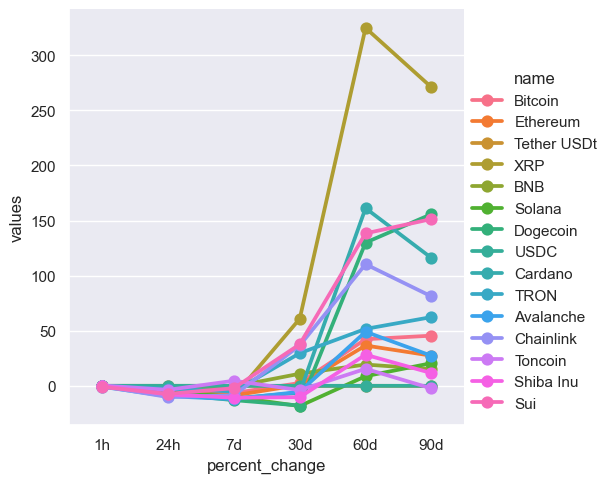

In [79]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [82]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,95328.62935,2024-12-26 11:24:15.032461
15,Bitcoin,95328.62935,2024-12-26 11:24:15.690011
30,Bitcoin,95356.06854,2024-12-26 11:25:18.340034
45,Bitcoin,95393.80448,2024-12-26 11:26:19.989489
60,Bitcoin,95429.56161,2024-12-26 11:27:21.521859
75,Bitcoin,95505.18060,2024-12-26 11:28:22.869559


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

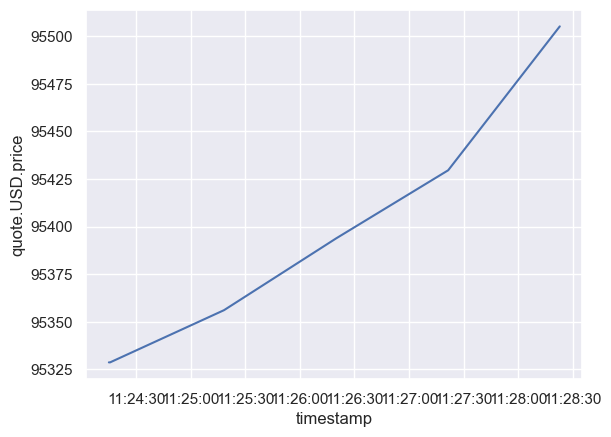

In [83]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)